In [45]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import datetime
import psycopg2

conn = psycopg2.connect(dbname='java_crm', user='postgres', 
                        password='QhEO56Qvn2aElhLhh0SO', host='database-1.c1ipwagrda55.us-east-2.rds.amazonaws.com')
cursor = conn.cursor()

In [2]:
conn.rollback()
cursor.execute("SELECT * FROM customers WHERE customer_id='879864dab9bc3047522c92c82e1212b8'")
records = cursor.fetchmany(size=5)
print(records)


[('879864dab9bc3047522c92c82e1212b8', '4c93744516667ad3b8f1fb645a3116a4', 89254, 'jaragua do sul', 'SC')]


In [3]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import datetime

customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
products_cat_name_eng = pd.read_csv("product_category_name_translation.csv")

In [4]:
customers['customer_id']

0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object

In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_detailed = products.merge(order_items, how="left")
order_detailed.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [8]:
order_detailed = order_detailed.merge(orders, how='right')
order_detailed_normal = order_detailed[order_detailed.order_status != 'canceled']
orders_filtered = order_detailed_normal[['product_id','product_category_name','order_item_id','price']]
orders_filtered

,product_id,product_category_name,order_item_id,price
0,87285b34884572647811a353c7ac498a,utilidades_domesticas,1.0,29.99
1,595fac2a385ac33a80bd5114aec74eb8,perfumaria,1.0,118.70
2,aa4383b373c6aca5d8797843e5594415,automotivo,1.0,159.90
3,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,1.0,45.00
4,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,1.0,19.90
...,...,...,...,...
113420,f1d4ce8c6dd66c47bbaa8c6781c2a923,bebes,1.0,174.90
113421,b80910977a37536adeddd63663f916ad,eletrodomesticos_2,1.0,205.99
113422,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,1.0,179.99
113423,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2.0,179.99


In [9]:
analysis_by_price = orders_filtered.groupby(['product_category_name']).sum()
analysis_by_price.sort_values('price',ascending=False)

,order_item_id,price
product_category_name,,
beleza_saude,11044.0,1255695.13
relogios_presentes,6572.0,1198185.21
cama_mesa_banho,13647.0,1035964.06
esporte_lazer,9877.0,979740.92
informatica_acessorios,9805.0,904322.02
...,...,...
flores,37.0,1110.04
casa_conforto_2,39.0,760.27
cds_dvds_musicais,16.0,730.00


In [10]:
order_detailed = order_detailed.merge(orders, how='right')
order_detailed_normal = order_detailed[order_detailed.order_status != 'canceled']
orders_filtered_with_freight_price = order_detailed_normal[['product_id','product_category_name','order_item_id','price', 'freight_value']]
orders_filtered_with_freight_price['total_price'] = orders_filtered_with_freight_price['price'] + orders_filtered_with_freight_price['freight_value']
orders_filtered_with_freight_price.rename(columns = {'order_item_id' : 'order_items'}, inplace=True)
orders_filtered_with_freight_price

<ipython-input-10-f16a2affdf18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_filtered_with_freight_price['total_price'] = orders_filtered_with_freight_price['price'] + orders_filtered_with_freight_price['freight_value']
c:\users\beka\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,product_id,product_category_name,order_items,price,freight_value,total_price
0,87285b34884572647811a353c7ac498a,utilidades_domesticas,1.0,29.99,8.72,38.71
1,595fac2a385ac33a80bd5114aec74eb8,perfumaria,1.0,118.70,22.76,141.46
2,aa4383b373c6aca5d8797843e5594415,automotivo,1.0,159.90,19.22,179.12
3,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,1.0,45.00,27.20,72.20
4,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,1.0,19.90,8.72,28.62
...,...,...,...,...,...,...
113420,f1d4ce8c6dd66c47bbaa8c6781c2a923,bebes,1.0,174.90,20.10,195.00
113421,b80910977a37536adeddd63663f916ad,eletrodomesticos_2,1.0,205.99,65.02,271.01
113422,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,1.0,179.99,40.59,220.58
113423,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2.0,179.99,40.59,220.58


In [11]:
analysis_by_total_price = orders_filtered_with_freight_price.groupby(['product_category_name']).sum()
analysis_by_total_price.sort_values('price',ascending=False)

,order_items,price,freight_value,total_price
product_category_name,,,,
beleza_saude,11044.0,1255695.13,181970.65,1437665.78
relogios_presentes,6572.0,1198185.21,100107.26,1298292.47
cama_mesa_banho,13647.0,1035964.06,204422.07,1240386.13
esporte_lazer,9877.0,979740.92,167503.71,1147244.63
informatica_acessorios,9805.0,904322.02,146619.56,1050941.58
...,...,...,...,...
flores,37.0,1110.04,488.87,1598.91
casa_conforto_2,39.0,760.27,410.31,1170.58
cds_dvds_musicais,16.0,730.00,224.99,954.99


In [12]:
orders_filtered_with_freight_price.rename(columns = {'order_item_id' : 'order_items'}, inplace=True)

c:\users\beka\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [108]:

def create_tables():
    command = (
    """ CREATE TABLE top_product_categories (
        product_category_name varchar,
        order_items float,
        price float,
        freight_value float,
        total_price float        
        ); """
    )
    try:
        cursor.execute(command)
        cursor.close()
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

create_tables()
    

In [53]:
analysis_by_total_price['order_item_id'].head()


product_category_name
agro_industria_e_comercio    265.0
alimentos                    608.0
alimentos_bebidas            363.0
artes                        229.0
artes_e_artesanato            26.0
Name: order_item_id, dtype: float64

In [109]:
analysis_by_total_price.to_csv("top_product_categories.csv")

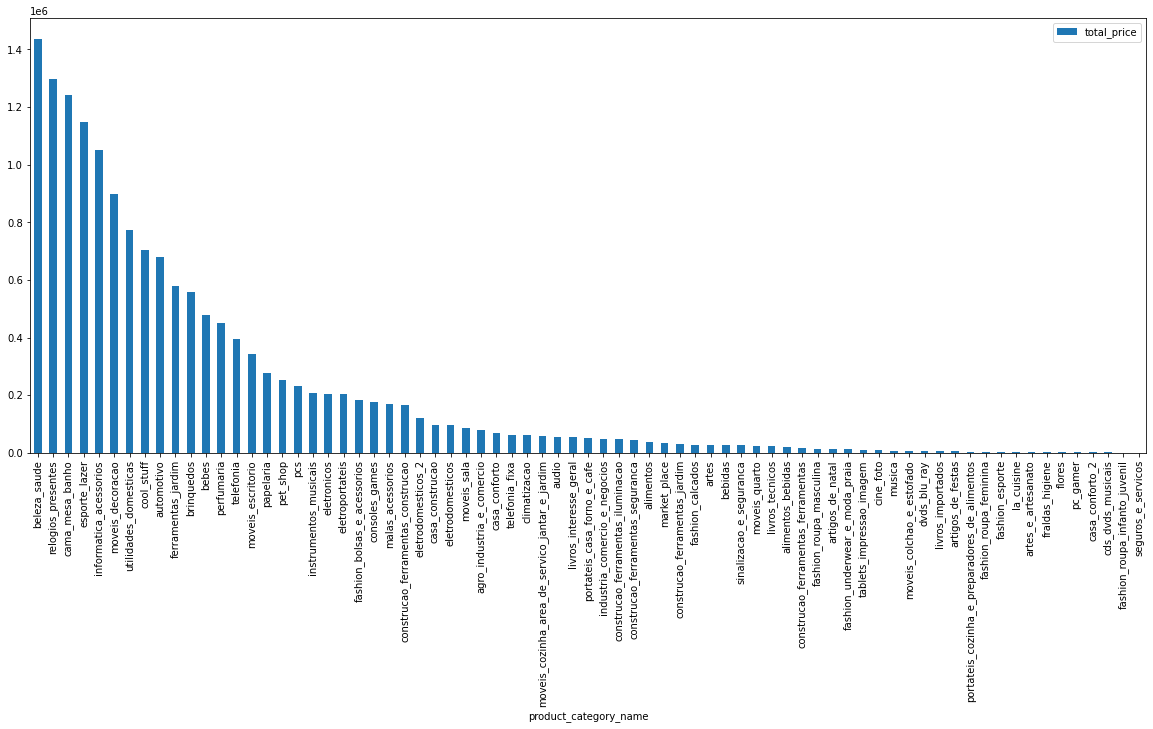

In [111]:
df_top_product_categories = pd.read_csv("top_product_categories.csv")
df_top_product_categories.groupby(df_top_product_categories['product_category_name'])['total_price'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

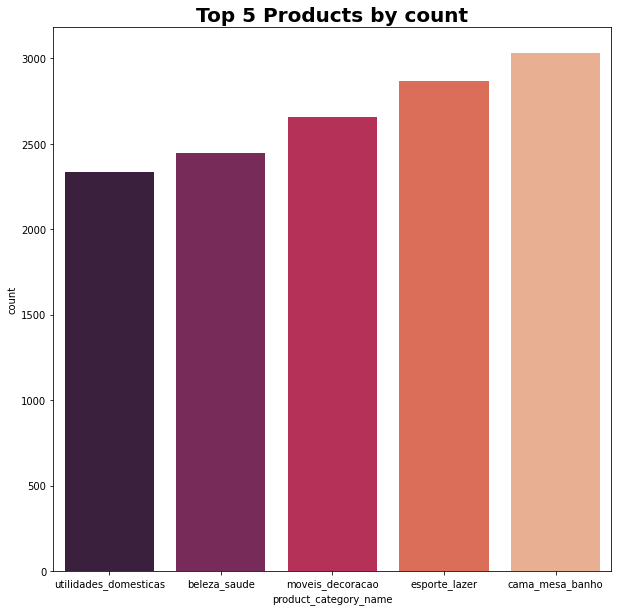

In [20]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x='product_category_name',data=products, palette='rocket',order=products['product_category_name'].value_counts()[:5].sort_values().index).set_title('Top 5 Products by count', fontsize=20, weight='bold')
plt.show()

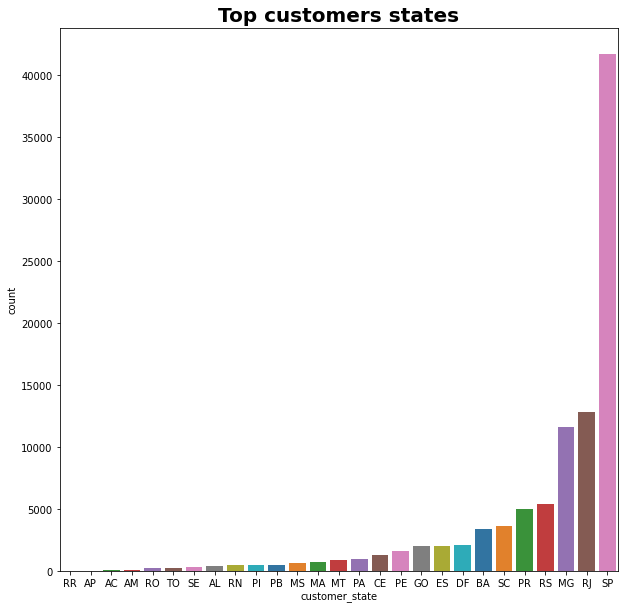

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x='customer_state',data=customers, palette='tab10',order=customers['customer_state'].value_counts().sort_values().index).set_title('Top customers states', fontsize=20, weight='bold')
plt.show()


In [40]:
state_customer = customers.customer_state.value_counts().sort_values(ascending = False).rename_axis('States').reset_index(name='Number of Customers')
state_customer.head(5)

,States,Number of Customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


In [43]:
state_customer.to_csv("sort_states_by_customers.csv", index=False) 

In [46]:

def create_tables():
    command = (
    """ CREATE TABLE top_states_by_customers (
        state varchar,
        number_of_customers int        
        ); """
    )
    try:
        cursor.execute(command)
        cursor.close()
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

create_tables()
    

In [49]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [50]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [55]:
orders['order_status'].describe()

count         99441
unique            8
top       delivered
freq          96478
Name: order_status, dtype: object

In [66]:
orders_normalize = orders.copy()
orders_normalize["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_normalize["order_approved_at"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_normalize["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_normalize["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_normalize["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
orders_normalize.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

<AxesSubplot:xlabel='order_approved_at'>

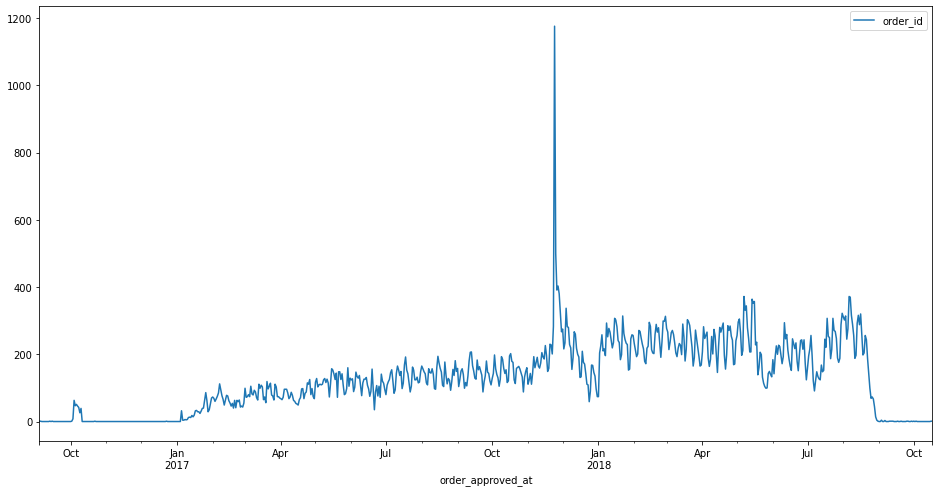

In [69]:
order_counts = orders_normalize.set_index("order_approved_at").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
order_counts.plot(y = "order_id", use_index=True, ax=ax)
# В декабре до нового года 2018 года было совершено самое большое количество покупок

<AxesSubplot:xlabel='order_delivered_customer_date'>

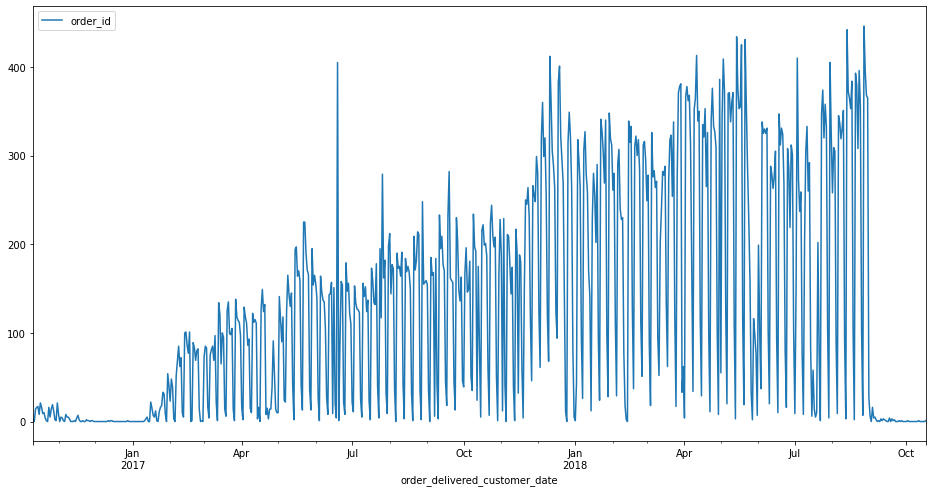

In [70]:
order_counts = orders_normalize.set_index("order_delivered_customer_date").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
order_counts.plot(y = "order_id", use_index=True, ax=ax)